In [1]:
# Task 1: Data Cleaning & Preprocessing
# Titanic Dataset

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# Step 2: Load Dataset
df = pd.read_csv('Data Cleaning and Preprocessing/Titanic-Dataset.csv') 
print("Initial Data Snapshot:")
print(df.head())

Initial Data Snapshot:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0

In [4]:
# Step 3: Explore Basic Information
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Step 4: Handle Missing Values
# Fill Age with median
df.fillna({'Age': df['Age'].median()}, inplace=True)

In [10]:
# Fill Embarked with mode
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)

In [11]:
# Drop Cabin due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

In [12]:
# Step 5: Encode Categorical Variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [13]:
# Step 6: Normalize Numerical Features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


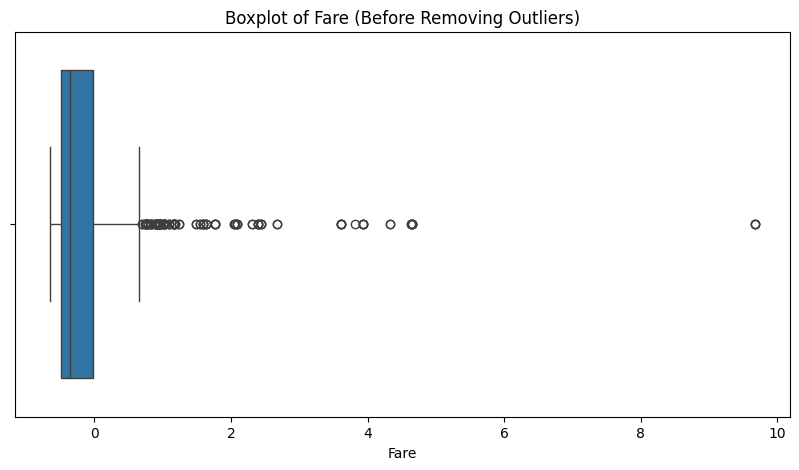

In [14]:
# Step 7: Visualize and Remove Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare (Before Removing Outliers)")
plt.show()

In [15]:
# Remove top 5% Fare outliers
q_high = df['Fare'].quantile(0.95)
df = df[df['Fare'] < q_high]

In [16]:
# Step 8: Final Dataset Preview
print("\nCleaned Dataset Preview:")
print(df.head())


Cleaned Dataset Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.565736      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.663861      1      0   
2                             Heikkinen, Miss. Laina -0.258337      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.433312      1      0   
4                           Allen, Mr. William Henry  0.433312      0      0   

             Ticket      Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171 -0.502445      True       False        True  
1          PC 17599  0.786845     False       False       False  
2  STON/O2. 3101282 -0.488854     False       False        True  
3           

In [17]:
df.to_csv('titanic_cleaned.csv', index=False)

In [19]:
cleaned_df = pd.read_csv("titanic_cleaned.csv")
cleaned_df.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.502445,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,1,0,PC 17599,0.786845,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.488854,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.420730,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.486337,True,False,True
